# Task 3: Exploratory Data Analysis on dataset 'SampleSuperstore' 
# Exploratory Data Analysis

- Data Science Business Analytics Internship
- GRIP @ The Sparks Foundaton
- BY: Sayli Raut

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# EDA

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.shape

(9994, 13)

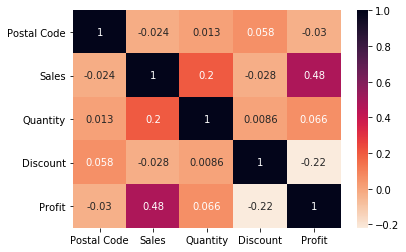

In [6]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

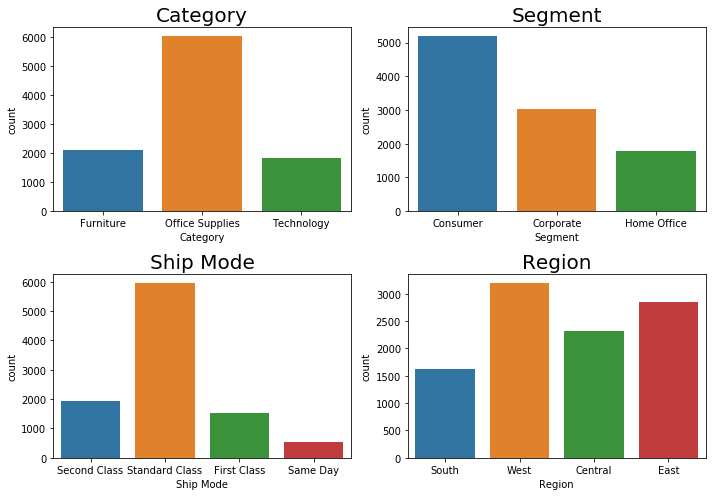

In [7]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

# Sub Category

Text(0.5, 1.0, 'Sub-Category')

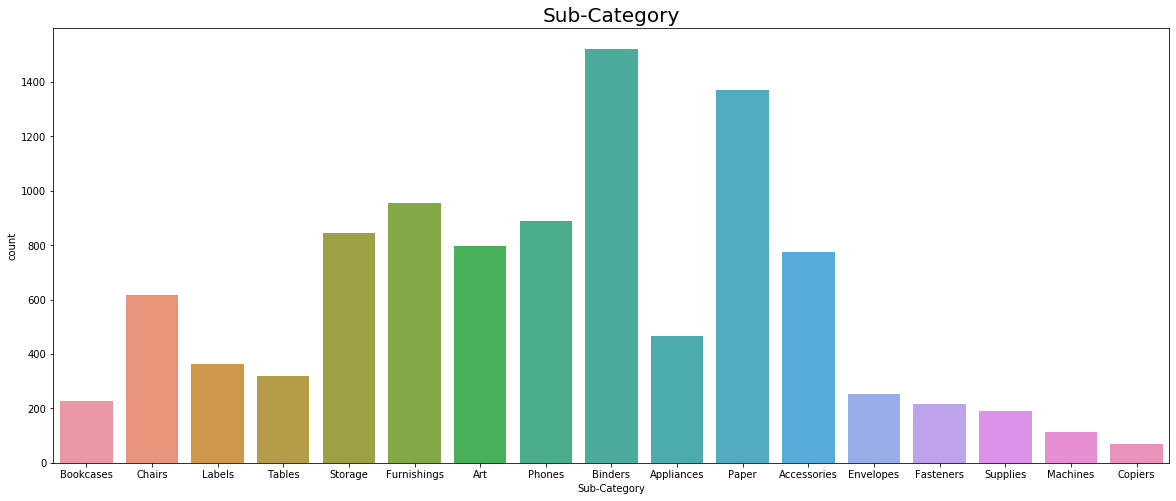

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

# Country

In [9]:
df['Country'].nunique()

1

# State

Text(0.5, 1.0, 'State')

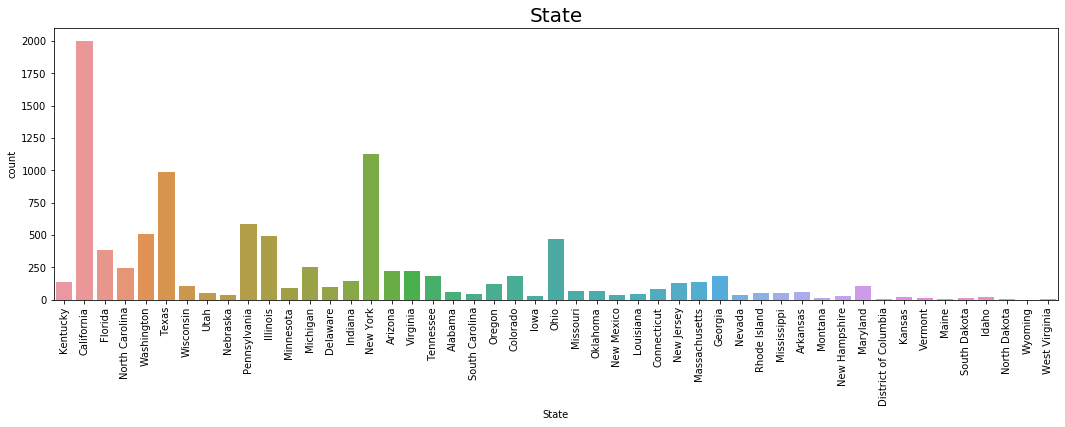

In [10]:
plt.figure(figsize=(18,5))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

# Here is top 3 state where deals are Highest.
1. Califonia
2. New York
3. Texas

# City

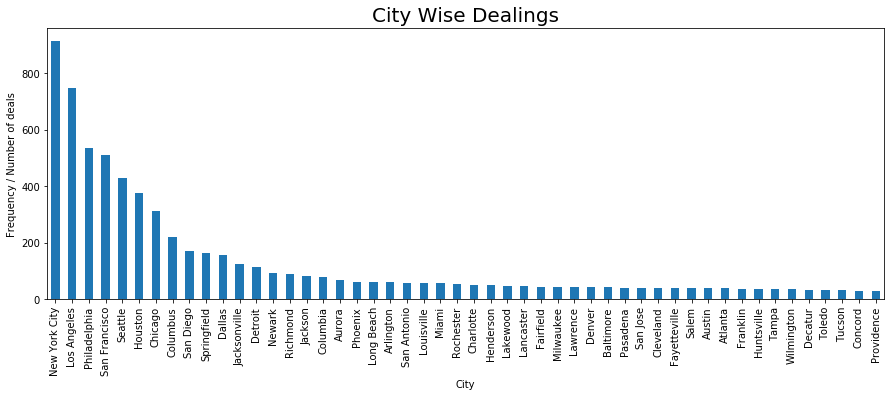

In [14]:
df2 = df['City'].value_counts()
df2=df2.head(50)


df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

# Here is top 3 city where deals are Highest.

1. New York City
2. Los Angeles
3. Philadelphia

# Distribution of data 

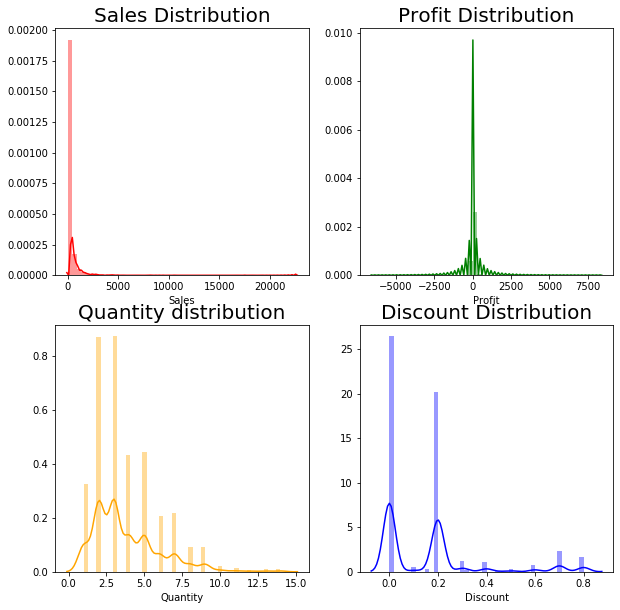

In [11]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

In [12]:
df['State'].value_counts().mean()

203.9591836734694

# Profit , Discount and Sale

Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

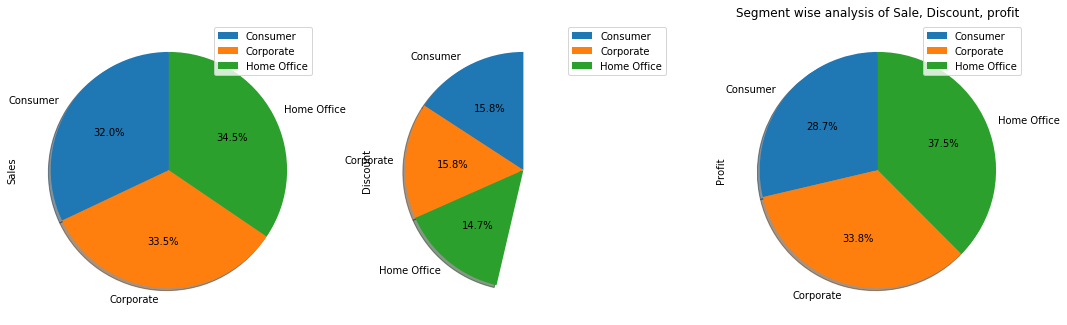

In [16]:

df['Segment'].value_counts()
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()


#1. sales 2. Discount 3. Profit
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

# State wise Profit

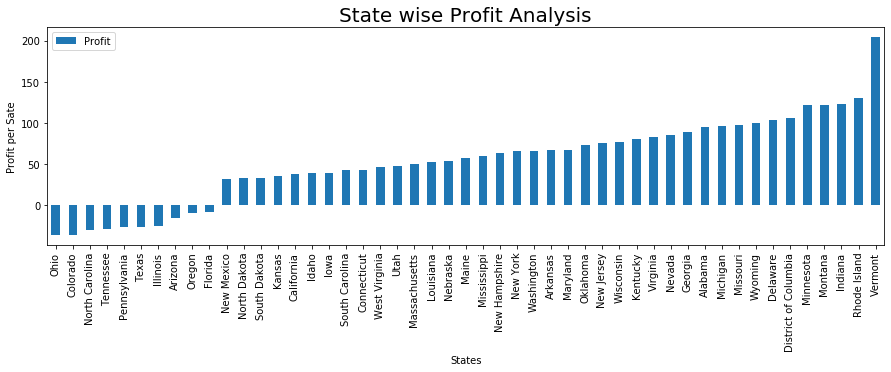

In [20]:
df['State'].value_counts().head(10)
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()


df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

- Vermont: Highest Profit

- Ohio: Lowest Profit

# Statewise sales analysis

Text(0.5, 1.0, 'State wise analysis of Sale')

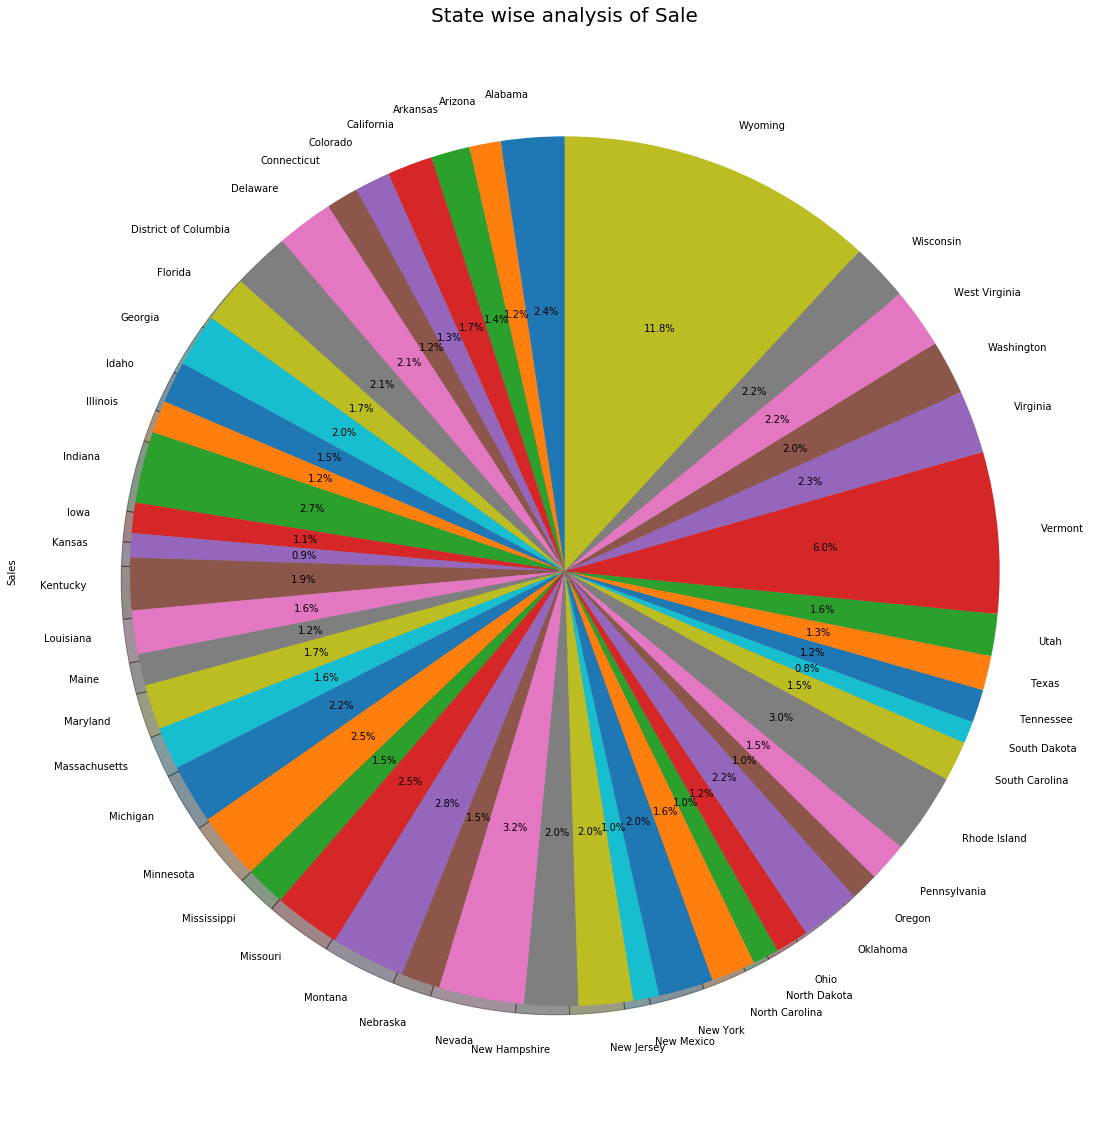

In [22]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

- Highest amount of sales= Wyoming(11.8%)
- Lowest amount of sales= South Dakota(0.8%)

# QUANTITY WISE SALES, PROFIT AND DISCOUNT ANALYSIS

Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

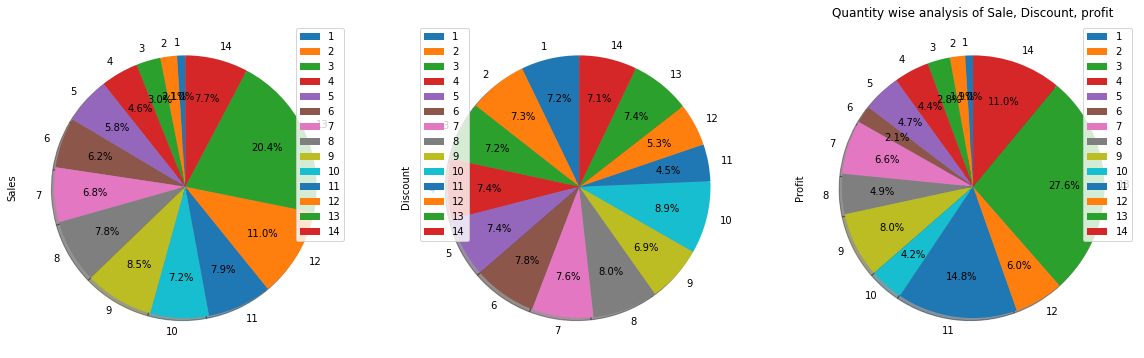

In [23]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
#1. sales 2. Discount 3. Profit
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')

- Maximun sales and Profit obtain in **Technology.**
- Minimun profit obtain in **Furniture**

# Sub-Category Wise Sales Analysis

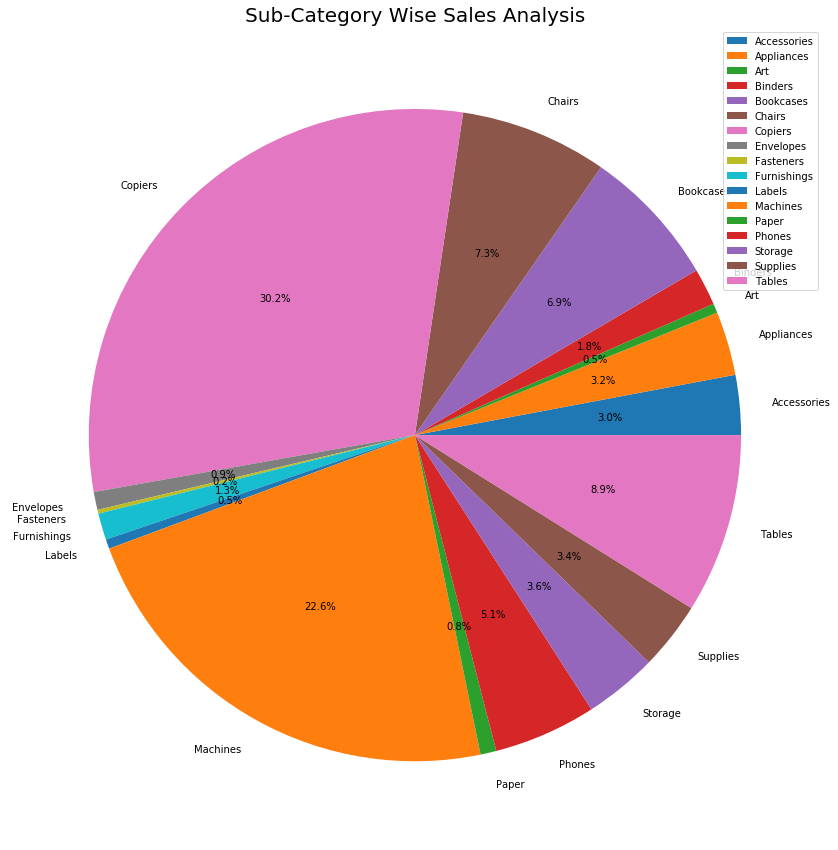

In [25]:

df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()



plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

**Copier then Machine have High sales.

# REGION WISE ANALYSIS

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D01251FD88>,
      dtype=object)

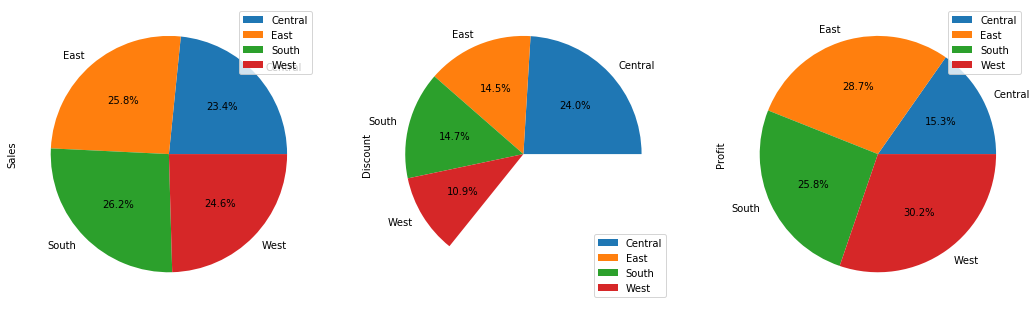

In [27]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region.plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_region.index)

WEST : PROFIT IS HIGH

# SHIP MODE WISE ANALYSIS

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D012EBD148>,
      dtype=object)

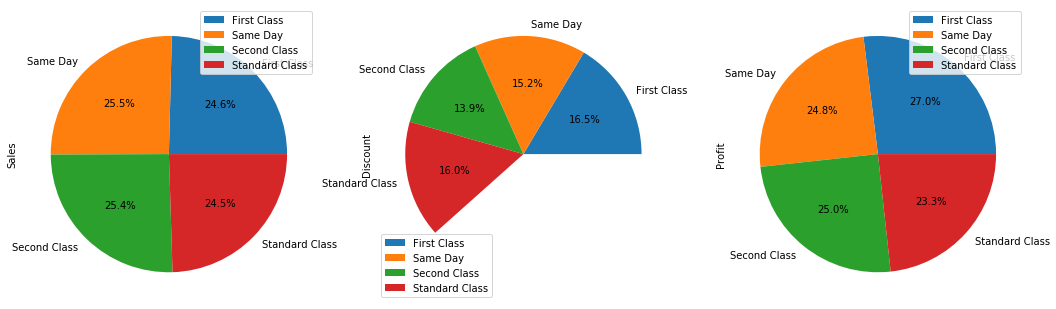

In [28]:
df['Ship Mode'].value_counts()
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()

df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

- Profit and Discount is high in First Class
- Sales is high for Same day ship